In [2]:
%matplotlib inline
%env CUDA_VISIBLE_DEVICES = 1

env: CUDA_VISIBLE_DEVICES=1


In [3]:
%run mylibrary.ipynb
%run mymodel.ipynb

2025-03-31 20:47:36.262731: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743454056.273120 2557368 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743454056.276310 2557368 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-31 20:47:36.288114: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import math
import random

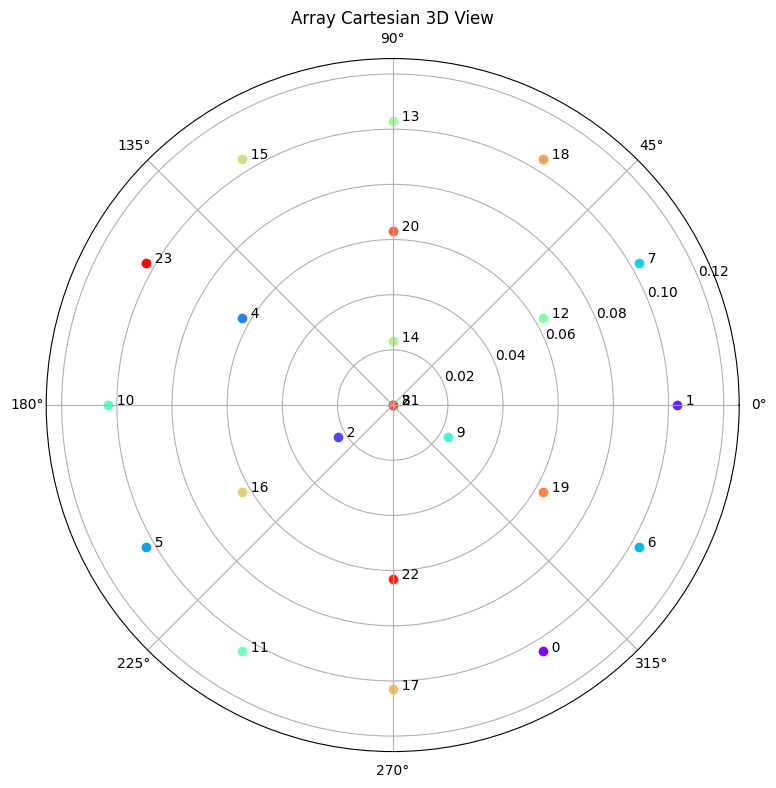

In [5]:
geometry = pd.read_csv('../AA_geometry.tsv', header=None, sep='\t')
AA_Geometry = geometry.to_numpy()
visualizer = Visualizer(AA_Geometry)
visualizer.polar(fig_size=(10,9),save_dir = 'plot/')

In [7]:
# Extract data from files
data = DataExtract("../data/rss360/", 24)
inputs, labels = data.get_delays_angles()

['random_signal_source_info_0.dat', 'random_signal_source_info_1.dat', 'random_signal_source_info_2.dat', 'random_signal_source_info_3.dat', 'random_signal_source_info_4.dat', 'random_signal_source_info_5.dat', 'random_signal_source_info_6.dat', 'random_signal_source_info_7.dat', 'random_signal_source_info_8.dat', 'random_signal_source_info_9.dat', 'random_signal_source_info_10.dat', 'random_signal_source_info_11.dat', 'random_signal_source_info_12.dat', 'random_signal_source_info_13.dat', 'random_signal_source_info_14.dat', 'random_signal_source_info_15.dat', 'random_signal_source_info_16.dat', 'random_signal_source_info_17.dat', 'random_signal_source_info_18.dat', 'random_signal_source_info_19.dat']
['random_signal_source_info_0_tau.bin', 'random_signal_source_info_1_tau.bin', 'random_signal_source_info_2_tau.bin', 'random_signal_source_info_3_tau.bin', 'random_signal_source_info_4_tau.bin', 'random_signal_source_info_5_tau.bin', 'random_signal_source_info_6_tau.bin', 'random_signal_

In [21]:
test1_df = pd.read_csv("plot/models_evaluation.csv")
list_channels = [re.findall(r'\d+',item['Channels']) for i,item in test1_df.iterrows()]
list_channels = [sorted([int(i) for i in ls]) for ls in list_channels]
list_channels

[[1, 14, 21],
 [12, 14, 20],
 [10, 11, 13],
 [8, 17, 22],
 [6, 11, 20],
 [7, 8, 21],
 [0, 12, 22],
 [8, 11, 13],
 [2, 10, 22],
 [7, 15, 22],
 [8, 16, 23],
 [1, 4, 14],
 [1, 5, 12],
 [7, 8, 11],
 [3, 11, 17],
 [6, 12, 13],
 [3, 7, 10],
 [4, 13, 23],
 [10, 13, 22],
 [4, 9, 15],
 [4, 16, 17],
 [3, 10, 13],
 [3, 10, 13],
 [8, 10, 15],
 [6, 16, 22],
 [15, 19, 21],
 [1, 13, 19],
 [5, 18, 21],
 [3, 4, 21],
 [7, 9, 11],
 [8, 15, 17],
 [0, 7, 18],
 [1, 14, 21],
 [17, 20, 22],
 [5, 13, 14],
 [4, 14, 22],
 [0, 15, 23],
 [5, 15, 23],
 [3, 7, 10],
 [0, 2, 12],
 [2, 10, 19],
 [3, 9, 20],
 [6, 15, 21],
 [3, 12, 20],
 [10, 12, 13],
 [0, 7, 17],
 [10, 11, 18],
 [13, 14, 16],
 [5, 12, 22],
 [15, 19, 23],
 [0, 2, 4, 6, 14, 23],
 [2, 4, 5, 6, 10, 16],
 [1, 5, 6, 15, 16, 22],
 [2, 5, 9, 13, 17, 22],
 [2, 10, 12, 14, 20, 23],
 [5, 6, 7, 13, 19, 23],
 [5, 11, 13, 15, 21, 22],
 [3, 8, 14, 15, 16, 17],
 [10, 14, 16, 17, 20, 21],
 [0, 1, 2, 13, 14, 15],
 [0, 2, 5, 7, 9, 18],
 [2, 3, 9, 10, 11, 15],
 [4, 8, 9, 1

In [ ]:
# training different models without he weights initialization
master_df = pd.DataFrame()
_, evaluates, losses = training_evaluation(list_channels, inputs, labels, he_initializer=False, loss='mse', epochs=30)
master_df = evaluates_table("relu",list_channels, evaluates)
master_df.to_csv("plot/models_evaluation_without_he_initialization.csv")
master_df

In [ ]:
# training different models with he weights initialization
master_df = pd.DataFrame()
_, evaluates, losses = training_evaluation(list_channels, inputs, labels, he_initializer=True, loss='mse', epochs=30)
master_df = evaluates_table("relu",list_channels, evaluates)
master_df.to_csv("plot/models_evaluation_with_he_initialization.csv")
master_df

In [8]:
df_without_he = pd.read_csv("plot/models_evaluation_without_weights_initialization.csv")
df_with_he = pd.read_csv("plot/models_evaluation_with_weights_initialization.csv")
df_without_he_mod = pd.read_csv("plot/models_evaluation_without_he_initialization.csv")
df_with_he_mod = pd.read_csv("plot/models_evaluation_with_he_initialization.csv")
list_channels = [re.findall(r'\d+',item['Channels']) for i,item in df_without_he.iterrows()]
list_channels = [sorted([int(i) for i in ls]) for ls in list_channels]

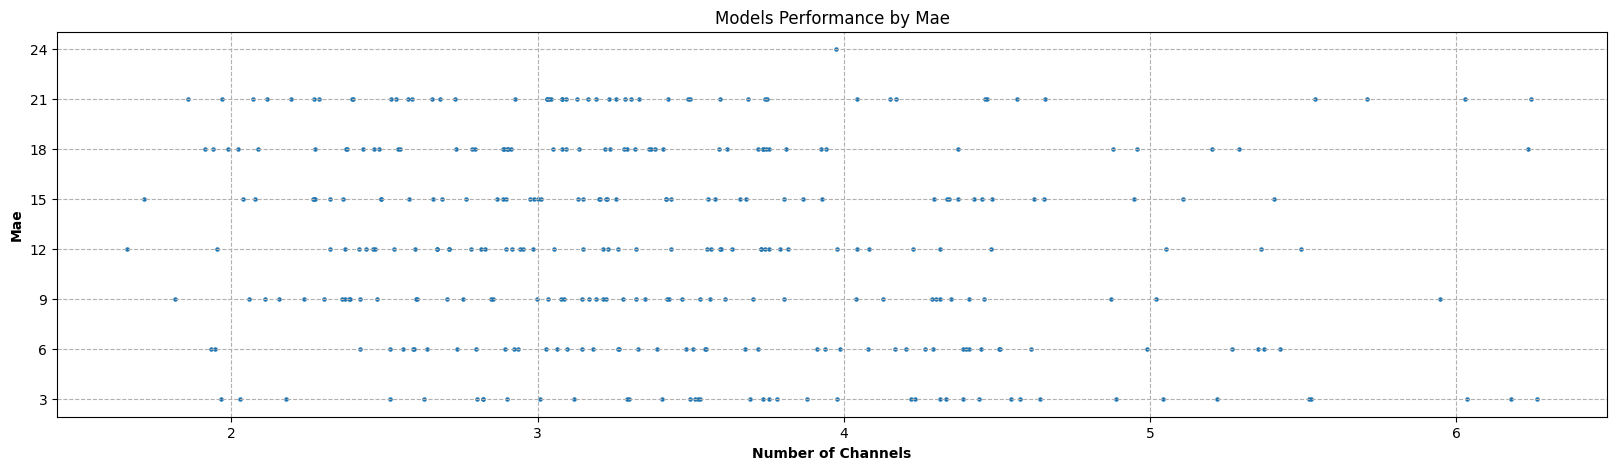

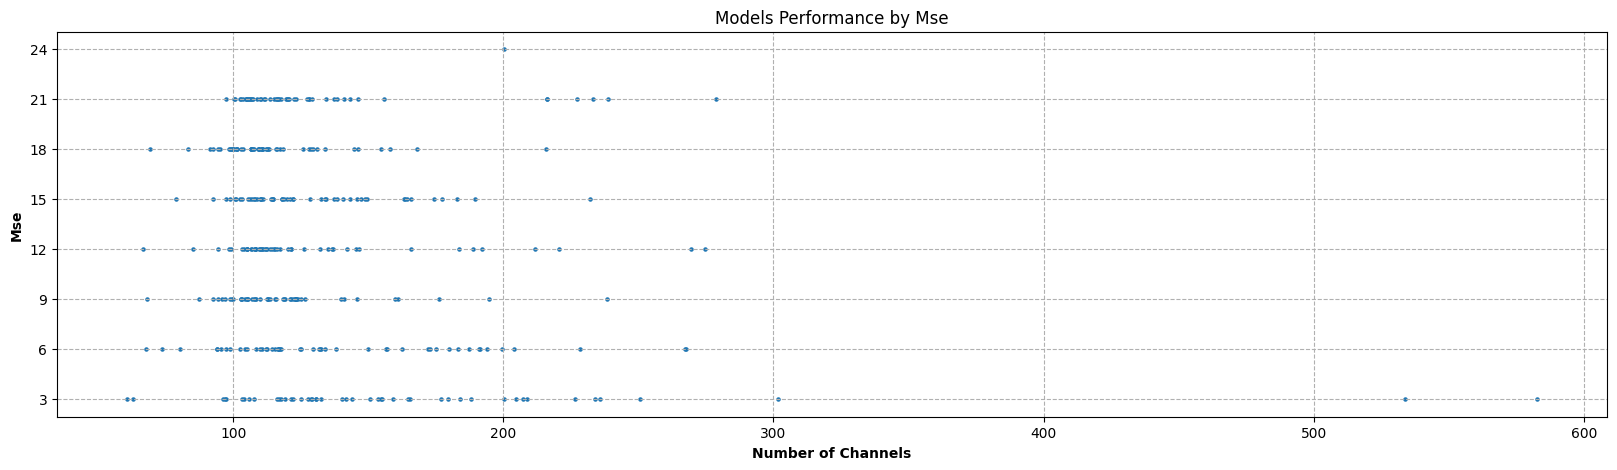

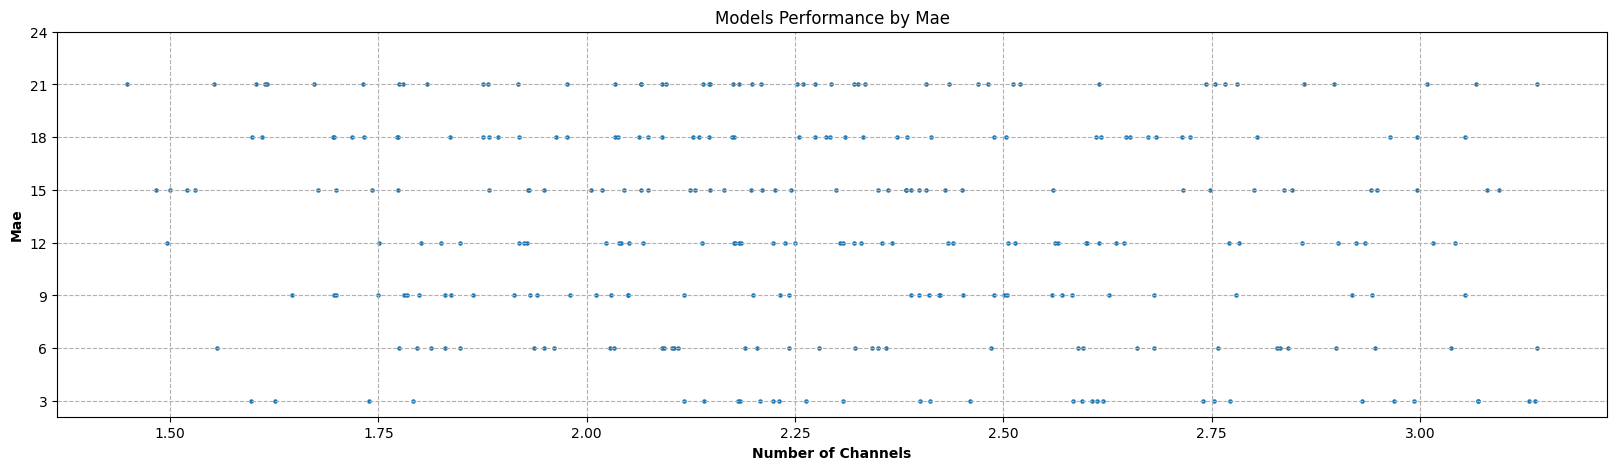

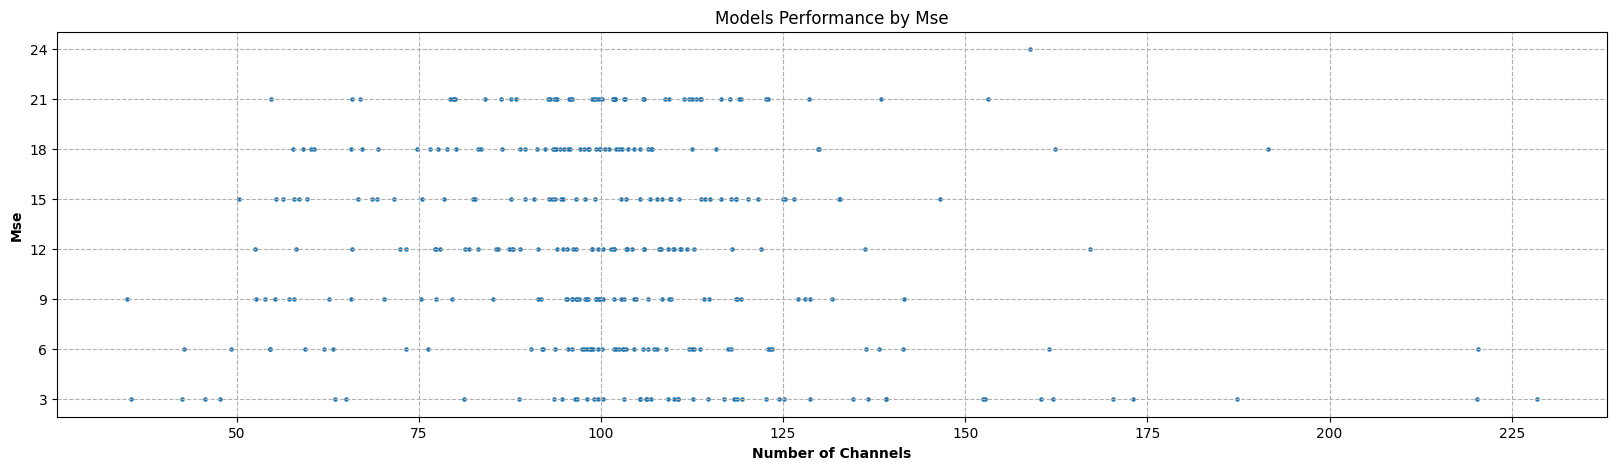

In [9]:
# ignore large outlier
plot_table(df_without_he, 'Mae', threshold = 0.01)
plot_table(df_without_he, 'Mse', threshold = 0.01)
plot_table(df_with_he, 'Mae', threshold = 0.01)
plot_table(df_with_he, 'Mse', threshold = 0.01)

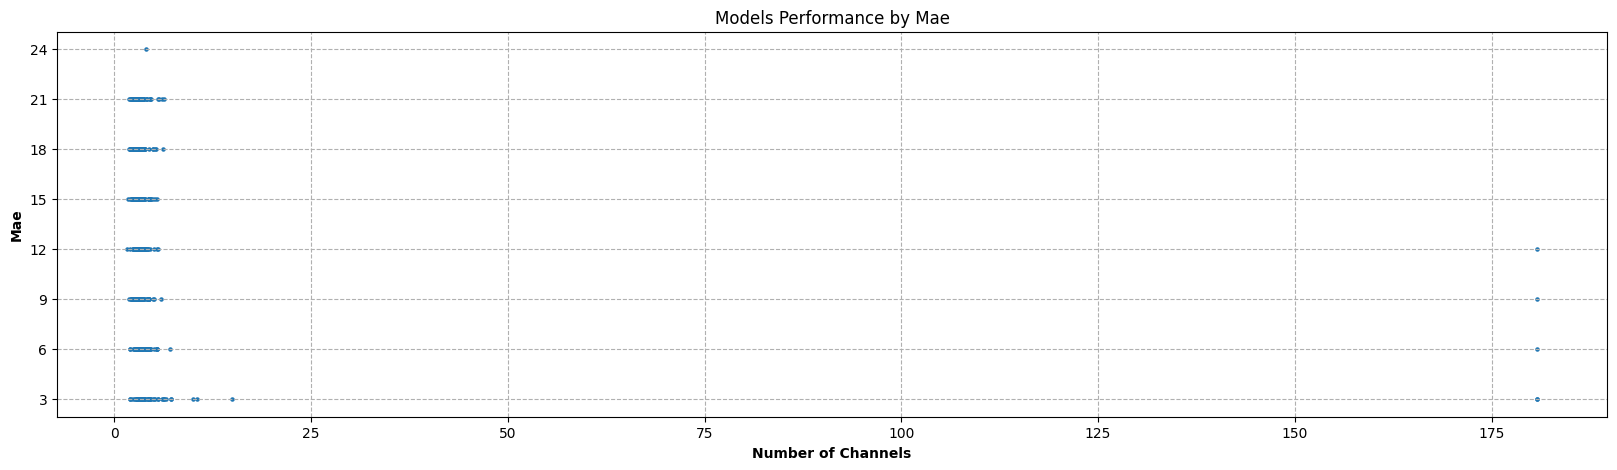

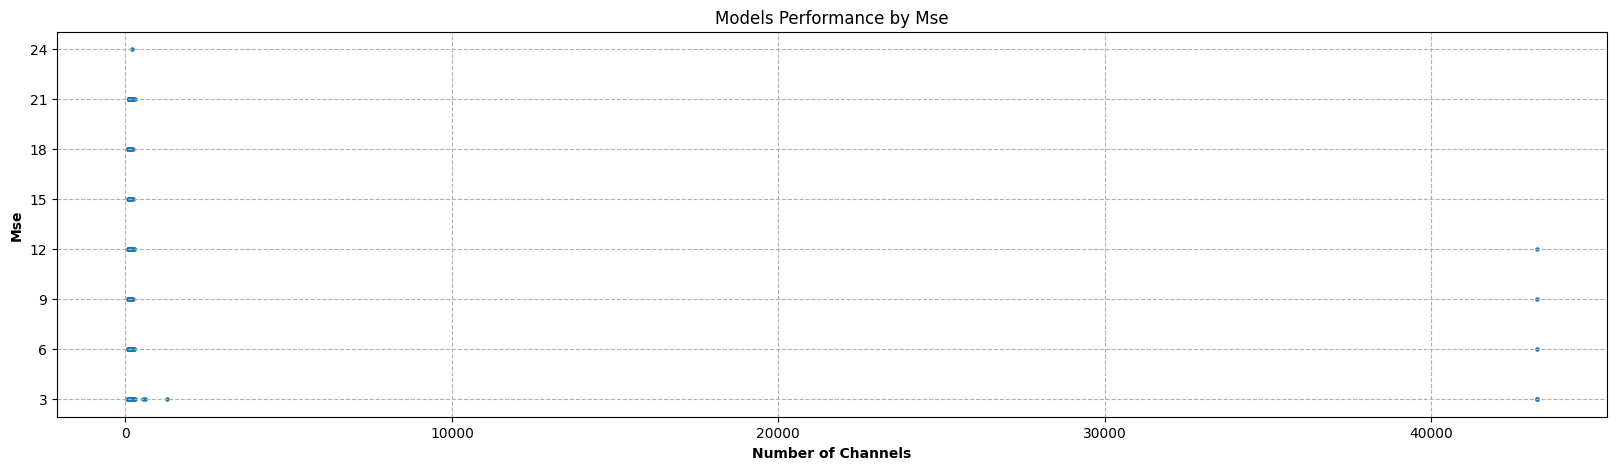

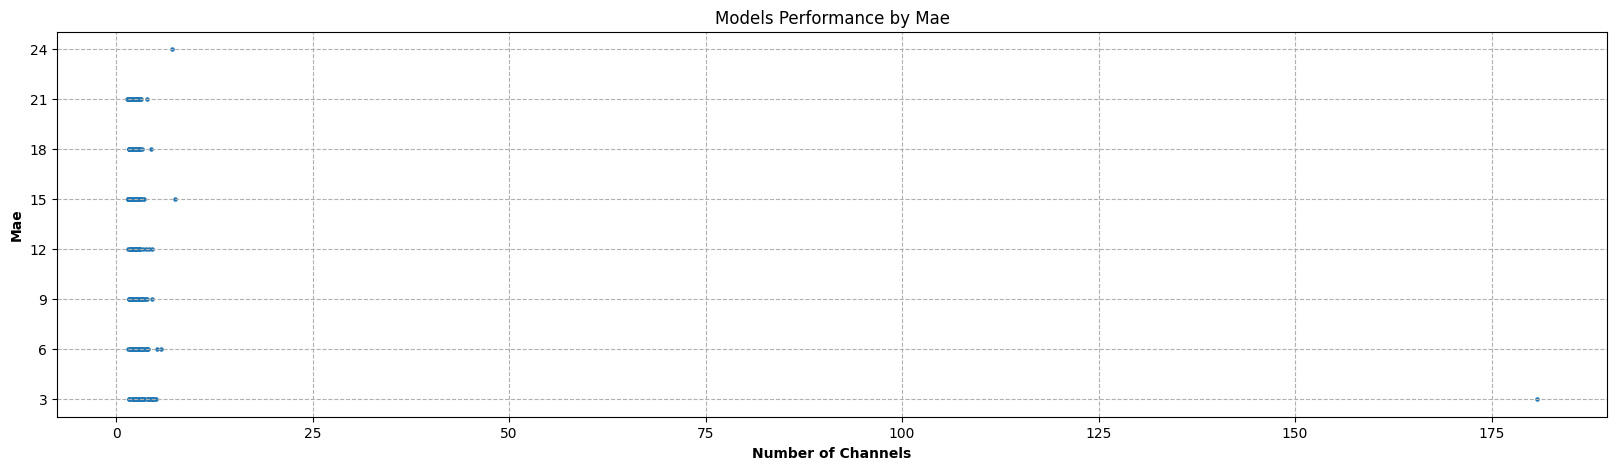

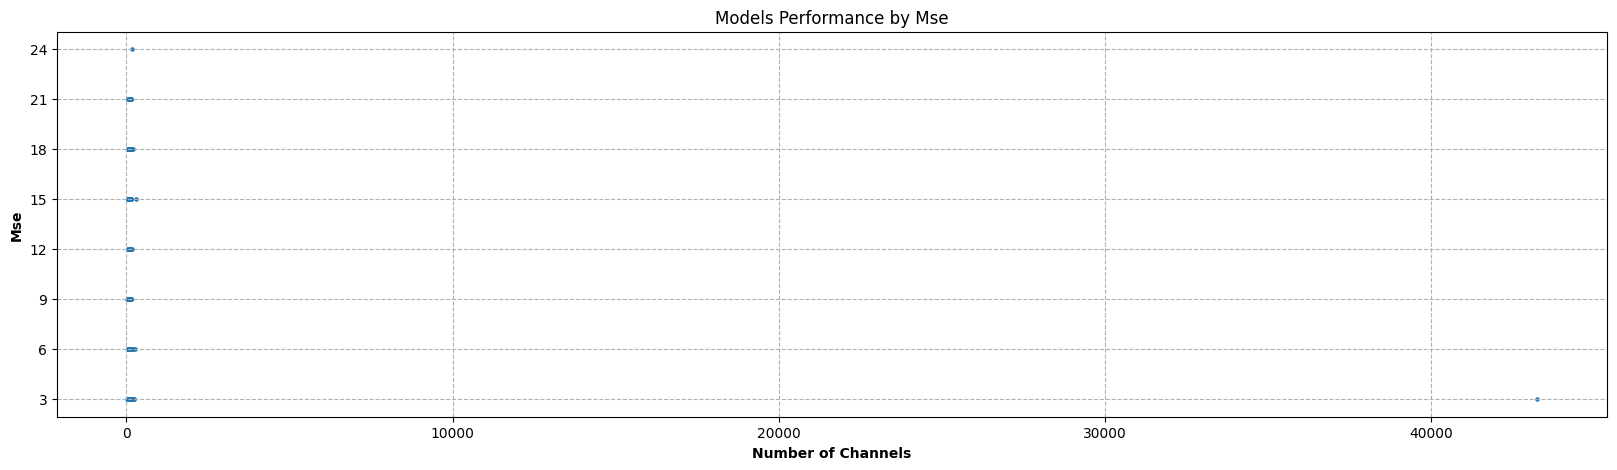

In [10]:
# include large outlier
plot_table(df_without_he, 'Mae', threshold = 100)
plot_table(df_without_he, 'Mse', threshold = 100)
plot_table(df_with_he, 'Mae', threshold = 100)
plot_table(df_with_he, 'Mse', threshold = 100)

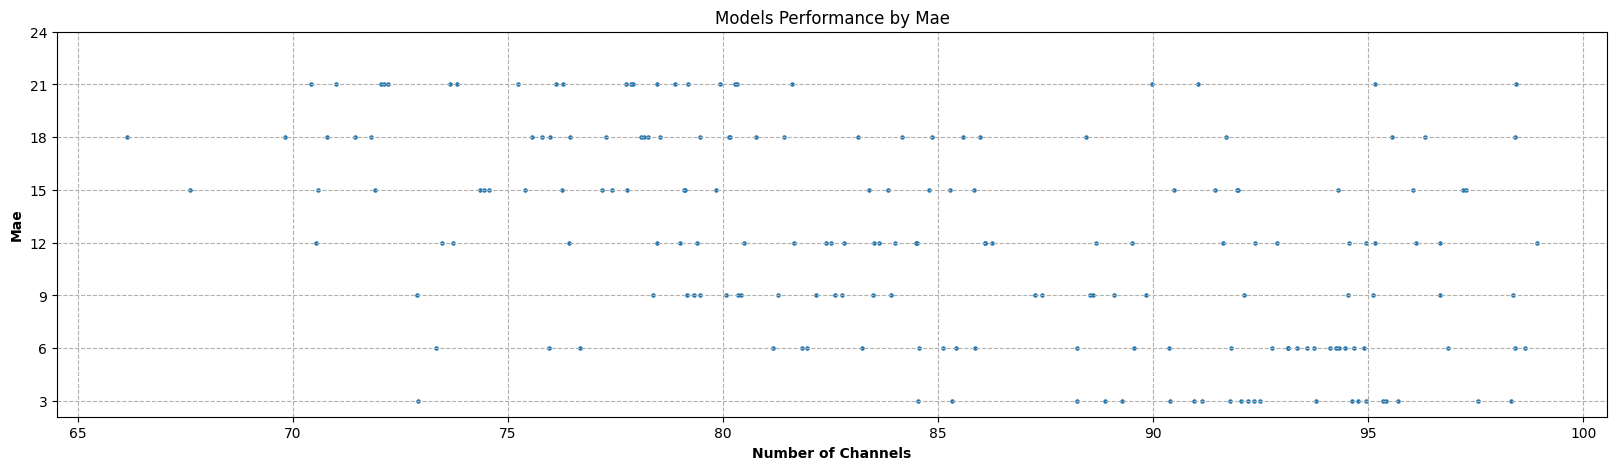

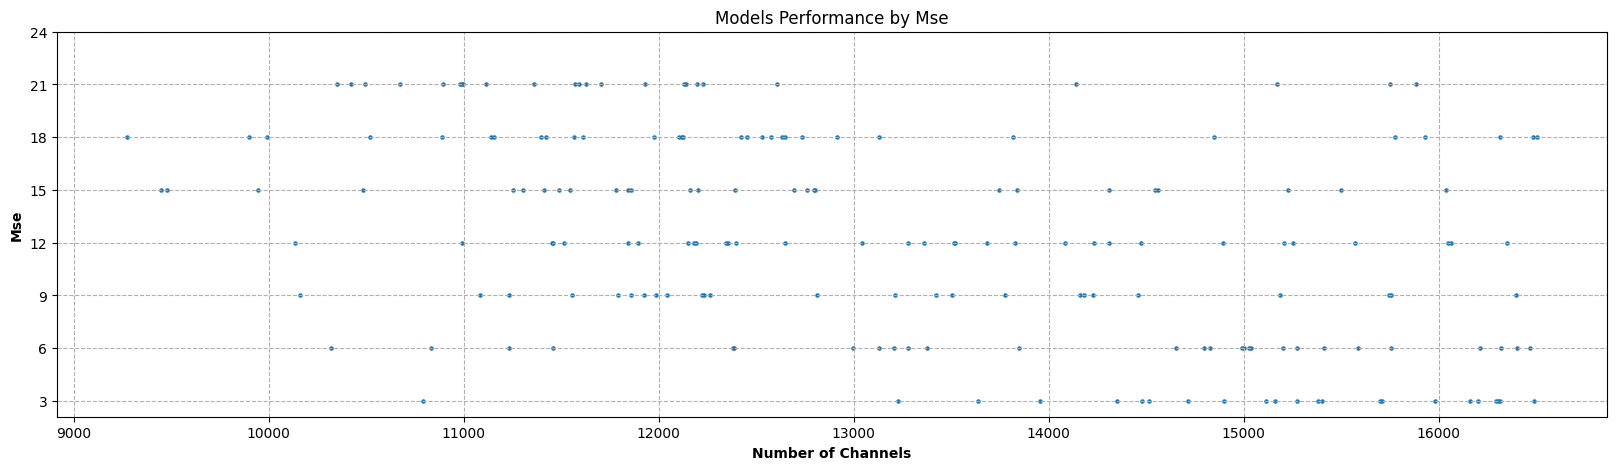

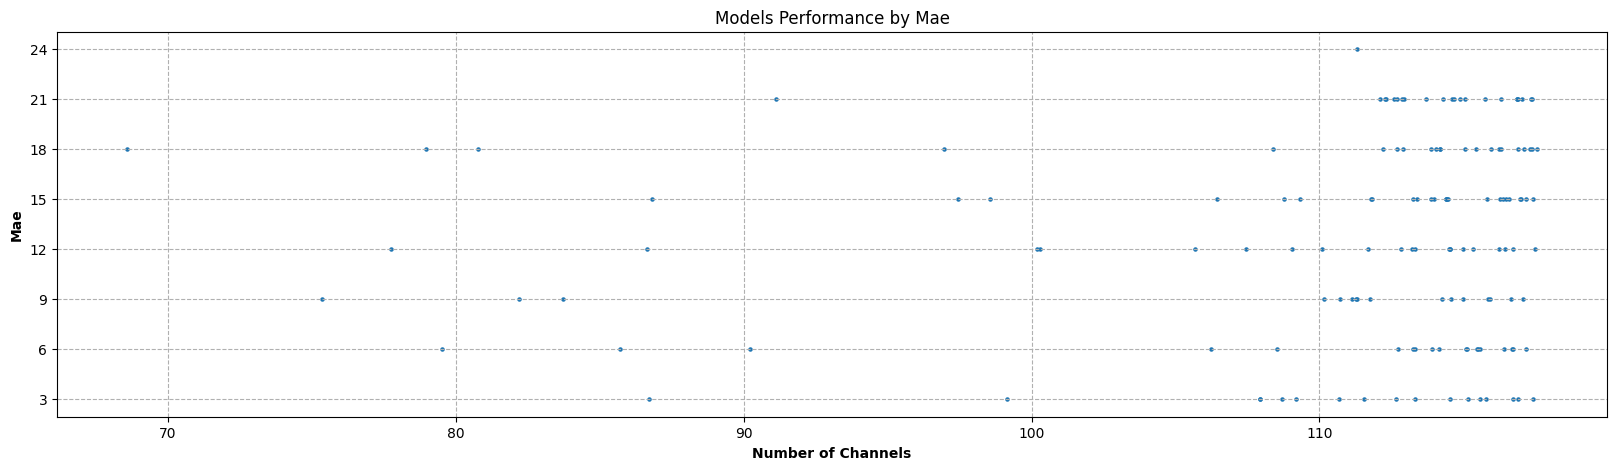

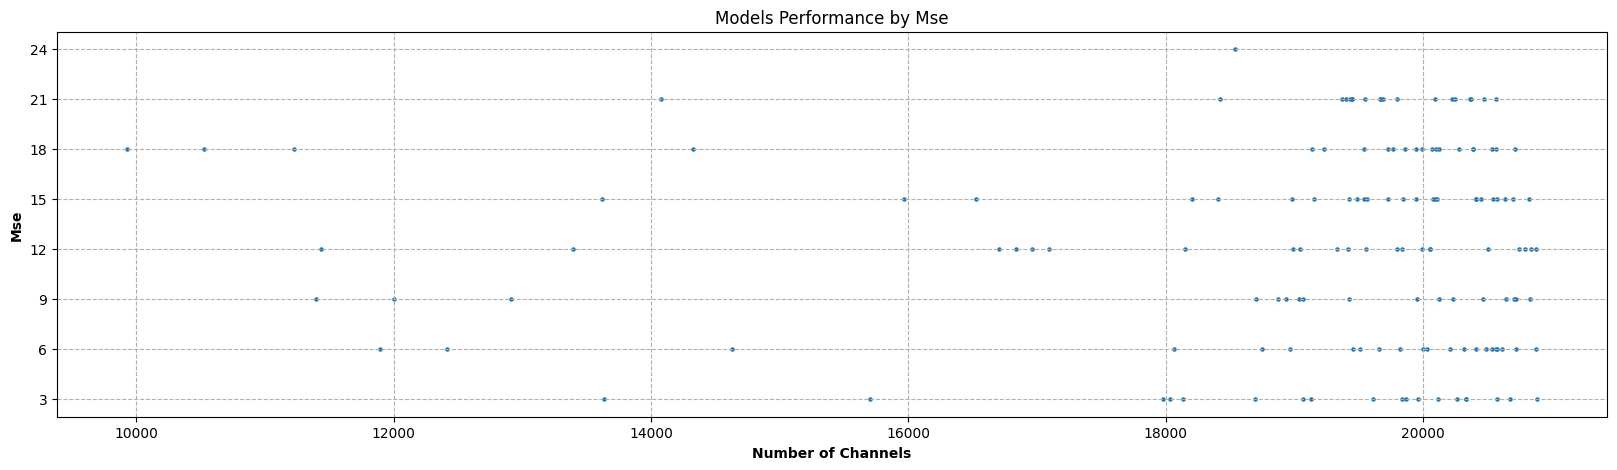

In [11]:
# ignore large outlier
plot_table(df_without_he_mod, 'Mae', threshold = 0.01)
plot_table(df_without_he_mod, 'Mse', threshold = 0.01)
plot_table(df_with_he_mod, 'Mae', threshold = 0.01)
plot_table(df_with_he_mod, 'Mse', threshold = 0.01)

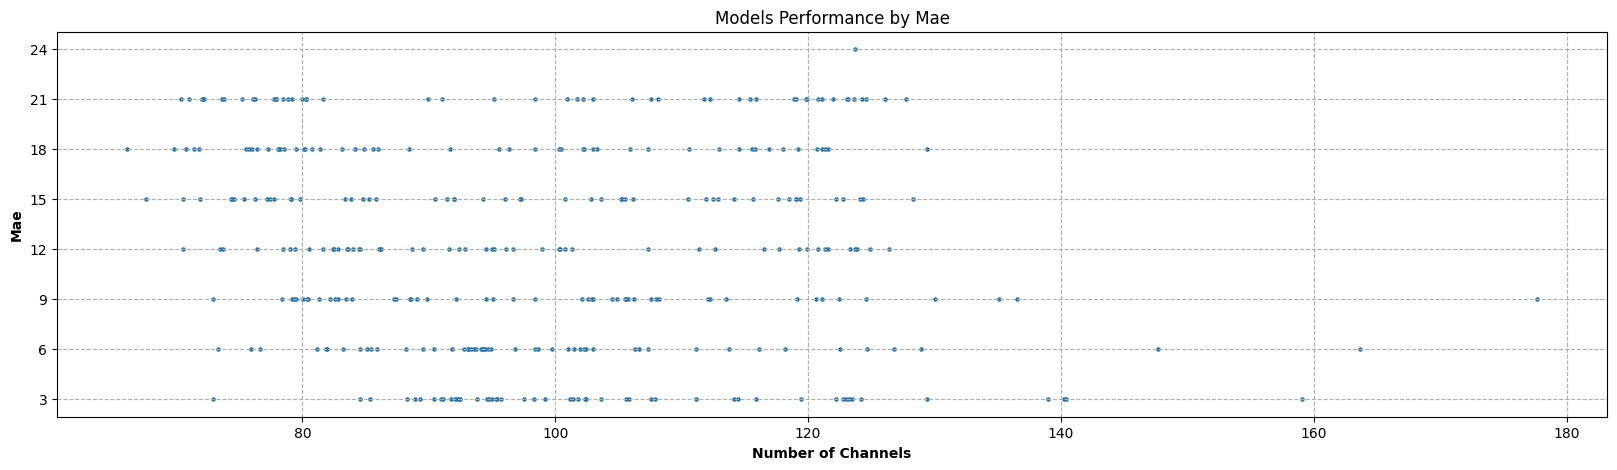

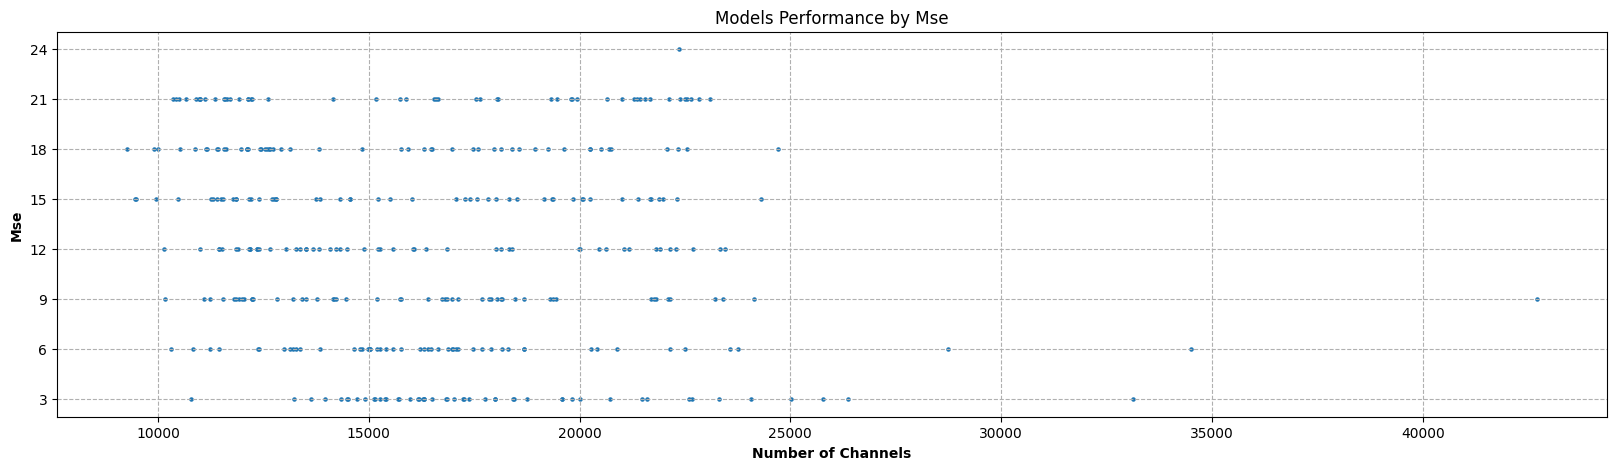

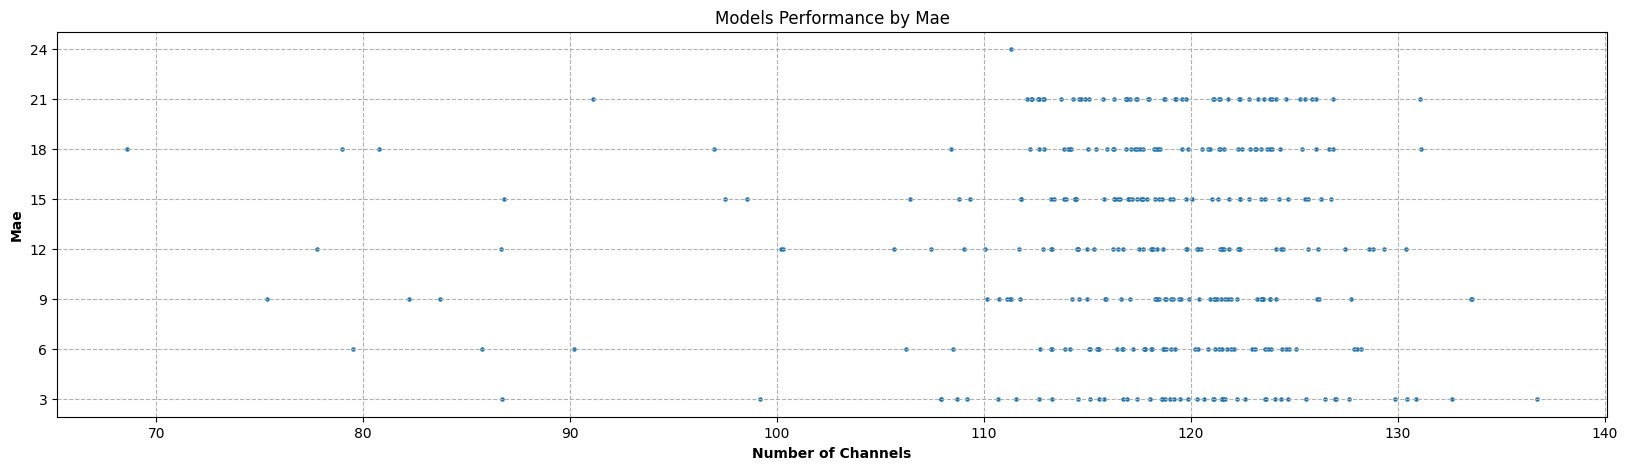

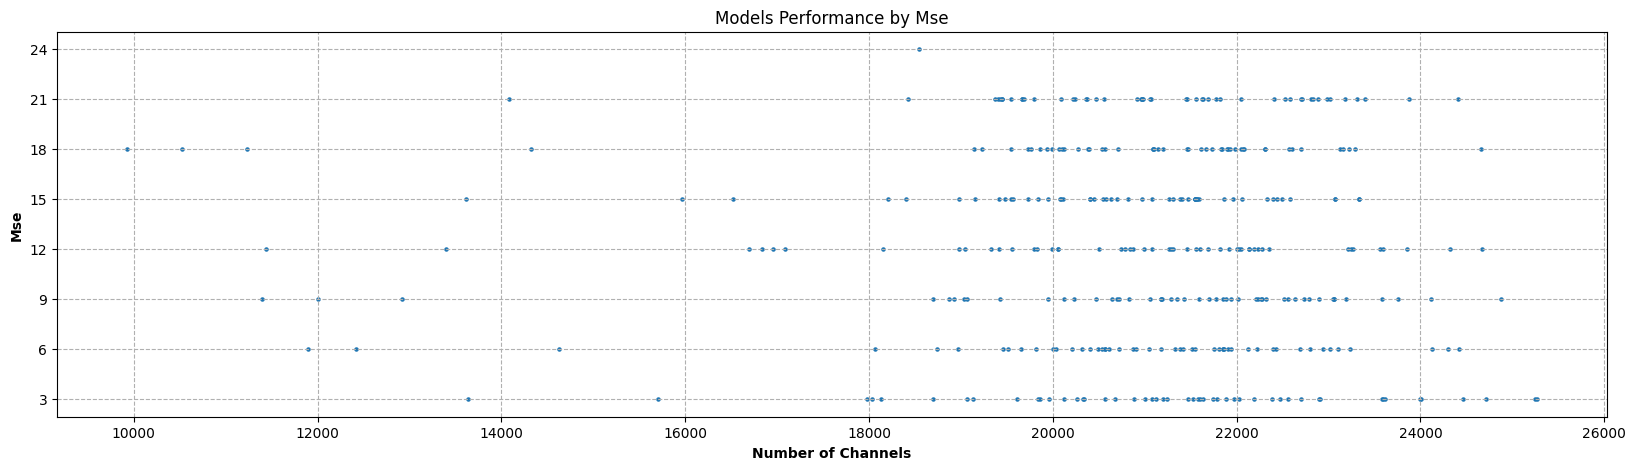

In [12]:
# include large outlier
plot_table(df_without_he_mod, 'Mae', threshold = 1000)
plot_table(df_without_he_mod, 'Mse', threshold = 1000)
plot_table(df_with_he_mod, 'Mae', threshold = 1000)
plot_table(df_with_he_mod, 'Mse', threshold = 1000)